In [55]:
import utils 
import pynq, time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.fftpack import fft
%matplotlib notebook
#%matplotlib tk

In [2]:
bitfile = '../bitfiles/snapshot/snapshot.bit'

snap_control = 0x41c00000
snap_mem = 0x41100000
length = 4096

In [3]:
pynq.Overlay(bitfile)    

In [4]:
global control, bram

control = utils.mmio(snap_control,8)
bram = utils.mmio(snap_mem, length)

In [33]:
def get_frame(control, bram, sleep_time=0.1):
    control.write(0, np.array(0))
    time.sleep(sleep_time)
    control.write(0, np.array(3))
    time.sleep(sleep_time)
    data = bram.read(0, 1024*4,'i2')
    dat0 = data[::2]
    dat1 = data[1::2]
    return [dat0, dat1]

<IPython.core.display.Javascript object>


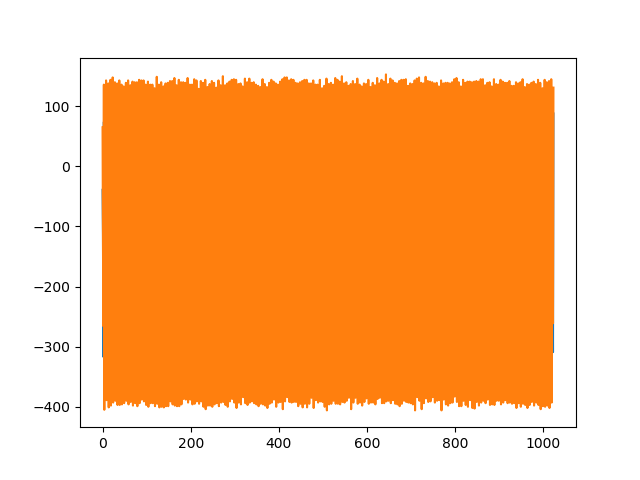

<IPython.core.display.Javascript object>


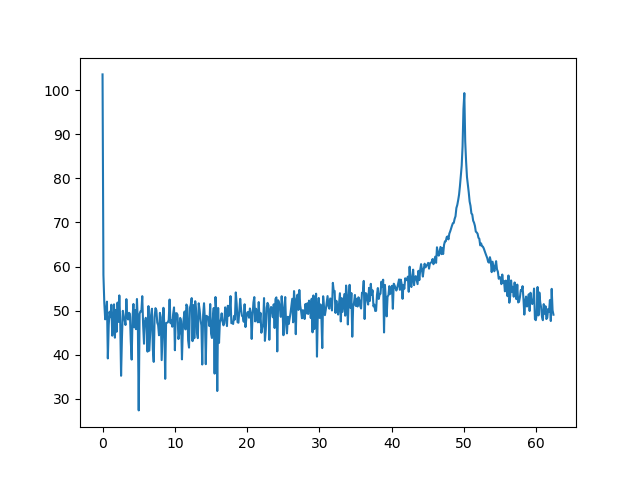

In [64]:
dat0, dat1 = get_frame(control, bram)
plt.figure()
plt.plot(dat0)
plt.plot(dat1)
plt.figure()
spec= fft(dat0)
freq = np.linspace(0, 125/2., int(len(dat0)/2), endpoint=False)
plt.plot(freq,20*np.log10(np.abs(spec[:len(spec)//2])))

<IPython.core.display.Javascript object>


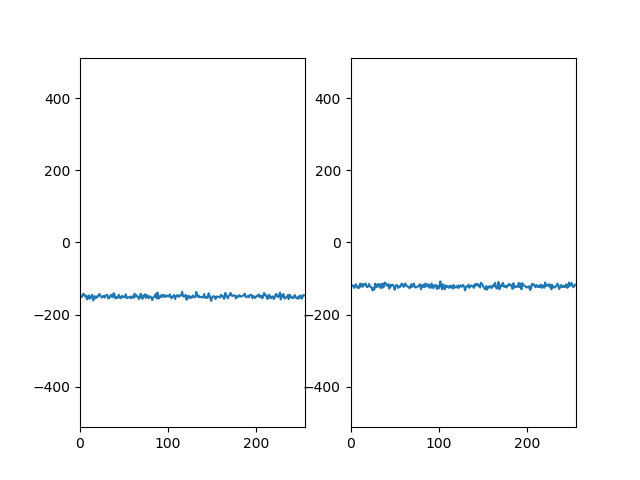

In [65]:
##animation
global samples
samples = 256
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

dat1, = ax1.plot([],[])
dat2, = ax2.plot([],[])
data = [dat1, dat2]

#ax1.set_ylim(-2**13, 2**13)
#ax2.set_ylim(-2**13, 2**13)
ax1.set_ylim(-512, 512)
ax2.set_ylim(-512, 512)
ax1.set_xlim(0, samples)
ax2.set_xlim(0, samples)


def animate(i):
    dat1, dat2 = get_frame(control, bram)
    data[0].set_data(np.arange(samples), dat1[:samples])
    data[1].set_data(np.arange(samples), dat2[:samples])
    return data

anim = FuncAnimation(fig, animate, interval=50, blit=True)
plt.show()
